In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dataset = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/master/Linear%20Regression/Weather.csv')
dataset.describe()

C:\Users\King\AppData\Local\Temp\ipykernel_11280\2026537621.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('https://raw.githubusercontent.com/kongruksiamza/MachineLearning/master/Linear%20Regression/Weather.csv')


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


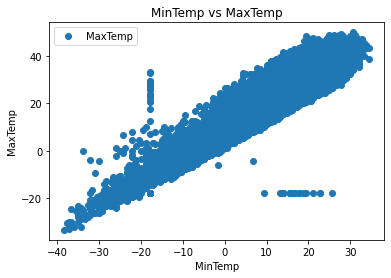

In [39]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [40]:
# Split the dataset into training and testing sets
X = dataset["MinTemp"].values.reshape(-1, 1)
Y = dataset["MaxTemp"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [41]:
#train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
#test the model
y_pred = model.predict(X_test)

In [43]:
#compare the actual data and the predicted data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) #flatten() is used to convert the data into 1D
df.shape

(23808, 2)

<AxesSubplot:>

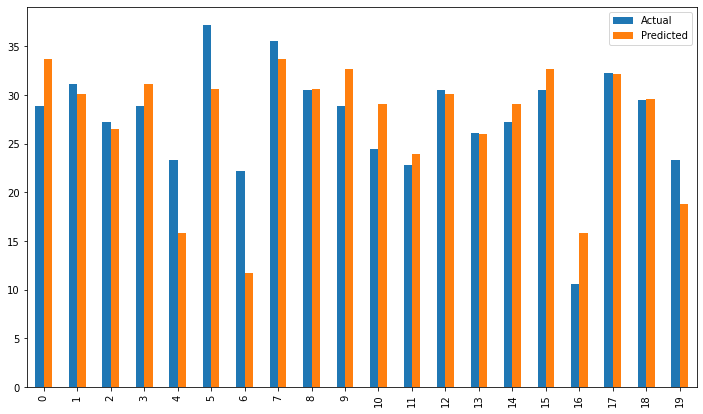

In [44]:
df_new = df.head(20)
df_new.plot(kind='bar',figsize=(12,7))

In [61]:
#Error
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
score = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error:", MAE) 
print("Mean Squared Error:", MSE) #MSE is used to calculate the error.It's used to compare the actual data and the predicted data.
print("Root Mean Squared Error:", RMSE)
print('Score: %.3f' %(score*100),"%")

Mean Absolute Error: 3.1993291783785835
Mean Squared Error: 17.631568097568532
Root Mean Squared Error: 4.198996082109215
Score: 76.702 %
